# Key papers

This Jupyter Notebook can be used to perform basic publication analysis for a science branch. 

**Features:**

1. Subtopic analysis based on co-citation graph clustering:
    * Chord diagram for co-citation graph
    * Comparison of subtopics by size
    * Timeline of each subtopic
    * Extraction of 1,2,3-grams describing each subtopic
2. Detection of highlight papers:
    * Top cited papers overall
    * Detection of most cited papers for each year
    * Detection of papers with max relative citation gain for each year
3. Citation dynamics visualization for highlight papers
4. Subtopic evolution tracking based on co-citation graph clustering for different time periods

## Getting Started

1. Define the `SEARCH_TERMS` variable in the cell below with a list of keywords that describe the science branch of your interest.
2. Run all cells & see the results.

In [61]:
SEARCH_TERMS = ['brain', 'computer', 'interface']

## Publication Analysis

In [65]:
import logging

from bokeh.plotting import show, output_notebook
from matplotlib import pyplot as plt

from keypaper.analysis import KeyPaperAnalyzer
from keypaper.visualization import Plotter

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(levelname)s: %(message)s')
output_notebook()
%matplotlib inline

Loading BokehJS ...

2019-05-16 17:05:04,338 DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [67]:
analyzer = KeyPaperAnalyzer()
analyzer.launch(*SEARCH_TERMS)

TODO: handle queries which return more than 1000000 items
TODO: use local database instead of PubMed API


2019-05-16 17:05:22,150 INFO: Found 7416 articles about ('brain', 'computer', 'interface')
2019-05-16 17:05:22,151 INFO: Loading publication data
2019-05-16 17:05:22,156 INFO: Creating pmids table for request with index.
2019-05-16 17:05:23,654 INFO: Found 7343 publications in the local database

2019-05-16 17:05:23,654 INFO: Started loading citation stats
2019-05-16 17:06:03,563 INFO: Done loading citation stats
2019-05-16 17:06:03,647 INFO: Loaded citation stats for 5354 of 7416 articles. Others may either have zero citations or be absent in the local database.
2019-05-16 17:06:03,659 INFO: 5307 articles are further analyzed

2019-05-16 17:06:03,660 INFO: Calculating co-citations for selected articles
2019-05-16 17:06:10,624 INFO: Loaded 8818 lines of citing info
2019-05-16 17:06:10,625 INFO: Found 432265 co-cited pairs of articles
2019-05-16 17:06:10,626 INFO: Aggregating co-citations
2019-05-16 17:06:12,060 INFO: Filtering top 10000 or 80% of all the co-citations
2019-05-16 17:06:1

In [52]:
plotter = Plotter(analyzer)

## Subtopics a.k.a. Clusters in the Co-citation Graph

In [53]:
show(plotter.chord_diagram_components())

2019-05-16 15:55:24,713 INFO: Visualizing components with Chord diagram


In [54]:
show(plotter.component_size_summary())

2019-05-16 15:55:26,645 INFO: Summary component detailed info visualization


In [55]:
for p in plotter.subtopic_timeline_graphs():
    show(p)

2019-05-16 15:55:27,524 INFO: Per component detailed info visualization


## Top Cited Papers Overall

In [56]:
show(plotter.top_cited_papers())

## Top Cited Papers for Each Year

In [57]:
show(plotter.max_gain_papers())

2019-05-16 15:55:32,039 INFO: Different colors encode different papers


## Top by Relative Gain for Each Year

In [58]:
show(plotter.max_relative_gain_papers())

2019-05-16 15:55:32,498 INFO: Top papers in relative gain for each year
2019-05-16 15:55:32,499 INFO: Relative gain (year) = Citation Gain (year) / Citations before year
2019-05-16 15:55:32,500 INFO: Different colors encode different papers


## Citation per Year Dynamics

In [59]:
plotter.article_citation_dynamics()

2019-05-16 15:55:32,922 INFO: Choose ID to get detailed citations timeline for top cited / max gain or relative gain papers


## Component Evolution

2019-05-16 15:55:37,977 DEBUG: update_title_pos
2019-05-16 15:55:38,699 DEBUG: update_title_pos
2019-05-16 15:55:39,363 DEBUG: update_title_pos
2019-05-16 15:55:39,776 DEBUG: update_title_pos


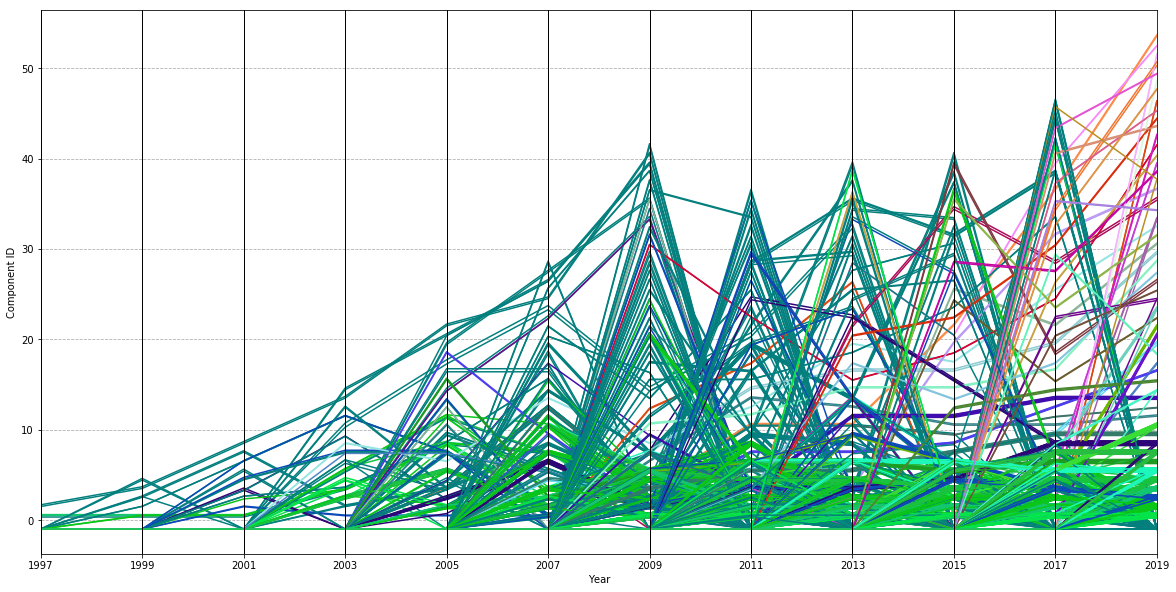

In [60]:
plt = plotter.subtopic_evolution()
plt.show()